In [1]:
import pandas as pd
df = pd.read_csv("metadata.csv")
df.head()

C:\Users\Meltem\AppData\Local\Temp\ipykernel_20248\126546089.py:2: DtypeWarning: Columns (1,4,5,6,13,14,15,16) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("metadata.csv")


,cord_uid,sha,source_x,title,doi,pmcid,pubmed_id,license,abstract,publish_time,authors,journal,mag_id,who_covidence_id,arxiv_id,pdf_json_files,pmc_json_files,url,s2_id
0,ug7v899j,d1aafb70c066a2068b02786f8929fd9c900897fb,PMC,Clinical features of culture-proven Mycoplasma...,10.1186/1471-2334-1-6,PMC35282,11472636,no-cc,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis,NaN,NaN,NaN,document_parses/pdf_json/d1aafb70c066a2068b027...,document_parses/pmc_json/PMC35282.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC3...,NaN
1,02tnwd4m,6b0567729c2143a66d737eb0a2f63f2dce2e5a7d,PMC,Nitric oxide: a pro-inflammatory mediator in l...,10.1186/rr14,PMC59543,11667967,no-cc,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/6b0567729c2143a66d737...,document_parses/pmc_json/PMC59543.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
2,ejv2xln0,06ced00a5fc04215949aa72528f2eeaae1d58927,PMC,Surfactant protein-D and pulmonary host defense,10.1186/rr19,PMC59549,11667972,no-cc,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/06ced00a5fc04215949aa...,document_parses/pmc_json/PMC59549.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
3,2b73a28n,348055649b6b8cf2b9a376498df9bf41f7123605,PMC,Role of endothelin-1 in lung disease,10.1186/rr44,PMC59574,11686871,no-cc,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/348055649b6b8cf2b9a37...,document_parses/pmc_json/PMC59574.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN
4,9785vg6d,5f48792a5fa08bed9f56016f4981ae2ca6031b32,PMC,Gene expression in epithelial cells in respons...,10.1186/rr61,PMC59580,11686888,no-cc,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res,NaN,NaN,NaN,document_parses/pdf_json/5f48792a5fa08bed9f560...,document_parses/pmc_json/PMC59580.xml.json,https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5...,NaN


In [2]:
df = pd.read_csv("metadata.csv", usecols=["title", "authors", "publish_time", "journal", "abstract"])
df.head()

,title,abstract,publish_time,authors,journal
0,Clinical features of culture-proven Mycoplasma...,OBJECTIVE: This retrospective chart review des...,2001-07-04,"Madani, Tariq A; Al-Ghamdi, Aisha A",BMC Infect Dis
1,Nitric oxide: a pro-inflammatory mediator in l...,Inflammatory diseases of the respiratory tract...,2000-08-15,"Vliet, Albert van der; Eiserich, Jason P; Cros...",Respir Res
2,Surfactant protein-D and pulmonary host defense,Surfactant protein-D (SP-D) participates in th...,2000-08-25,"Crouch, Erika C",Respir Res
3,Role of endothelin-1 in lung disease,Endothelin-1 (ET-1) is a 21 amino acid peptide...,2001-02-22,"Fagan, Karen A; McMurtry, Ivan F; Rodman, David M",Respir Res
4,Gene expression in epithelial cells in respons...,Respiratory syncytial virus (RSV) and pneumoni...,2001-05-11,"Domachowske, Joseph B; Bonville, Cynthia A; Ro...",Respir Res


In [3]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1056660 entries, 0 to 1056659
Data columns (total 5 columns):
 #   Column        Non-Null Count    Dtype 
---  ------        --------------    ----- 
 0   title         1056157 non-null  object
 1   abstract      821116 non-null   object
 2   publish_time  1054846 non-null  object
 3   authors       1032791 non-null  object
 4   journal       969338 non-null   object
dtypes: object(5)
memory usage: 40.3+ MB


title              503
abstract        235544
publish_time      1814
authors          23869
journal          87322
dtype: int64

In [4]:
from collections import Counter

titles = df['title'].dropna().str.lower().str.split()
word_counts = Counter([word for sublist in titles for word in sublist])

# Most common 20 word
word_counts.most_common(20)

[('of', 715597),
 ('the', 558064),
 ('and', 540346),
 ('in', 523303),
 ('covid-19', 369100),
 ('a', 341795),
 ('for', 207069),
 ('to', 163851),
 ('with', 162916),
 ('on', 127937),
 ('during', 115464),
 ('pandemic', 97712),
 ('patients', 83532),
 ('sars-cov-2', 79140),
 ('from', 73827),
 ('study', 68208),
 ('an', 63620),
 ('health', 59381),
 ('coronavirus', 52149),
 ('disease', 47549)]

In [5]:
df['authors'].dropna().str.split(';').explode().str.strip().value_counts().head(10)

authors
Anonymous,           3904
O039,                2532
D039,                1689
Wang, Wei             825
Ieee,                 741
Wiwanitkit, Viroj     716
Zhang, Wei            635
Mahase, Elisabeth     629
Li, Yan               607
Wang, Jing            596
Name: count, dtype: int64

<Axes: title={'center': 'Year to year publishment num'}, xlabel='publish_time'>

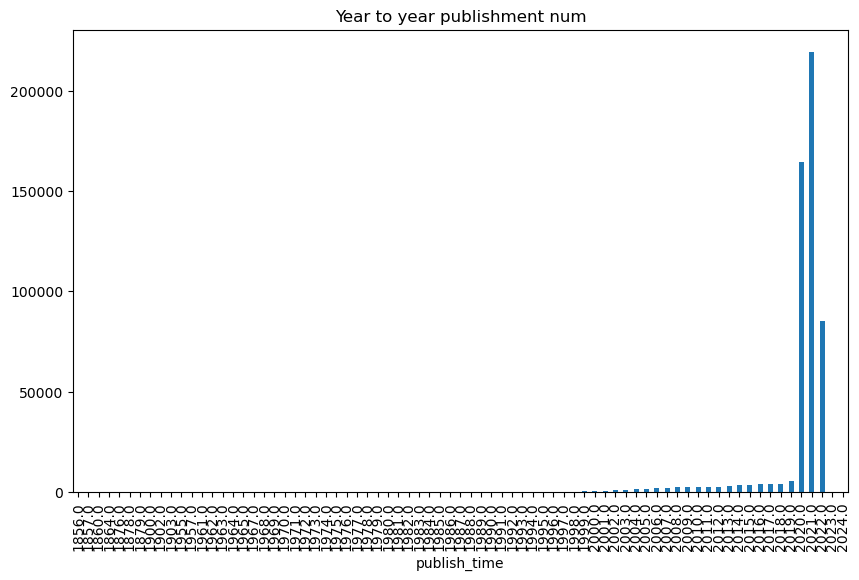

In [6]:
df['publish_time'] = pd.to_datetime(df['publish_time'], errors='coerce')
df['publish_time'].dt.year.value_counts().sort_index().plot(kind='bar', figsize=(10,6), title='Year to year publishment num')